# 机器学习之感知机

#### 【简介】

神经网络中最基本的成分是神经元模型，**感知机**（Perceptron）是由两层神经元组成的双层神经网络模型, 其输入层接受外界输入信号传递给输出层, 输出层是**M-P**神经元（阈值逻辑单元）。**感知机**也属于**二分类**的**线性分类**模型， 其**输入**为实例的**特征向量**， **输出**为实例的**类别**， 通常取+1和–1二值。

#### 【目录】

1. [感知机 - 西瓜好坏自动识别](#1.-感知机---西瓜好坏自动识别)
2. [scikit-learn感知机实践 - 癌细胞精准识别](#2.-scikit-learn感知机实践---癌细胞精准识别)

## 1. 感知机 - 西瓜好坏自动识别

### 任务描述

使用感知机算法建立一个模型，并根据感知机算法流程对模型进行训练，得到一个能够准确对西瓜好坏进行识别的模型。

### 相关知识
为了完成本任务，需要掌握：

1. 什么是感知机
2. 感知机算法流程

这里，我们利用西瓜书上的例子来构造数据，实例中包括特征和类别。构造了帮助预测的特征一共有 30个：色泽、根蒂、敲声等等。类别为是**是**与**否**（不是）好瓜**。部分数据如下：

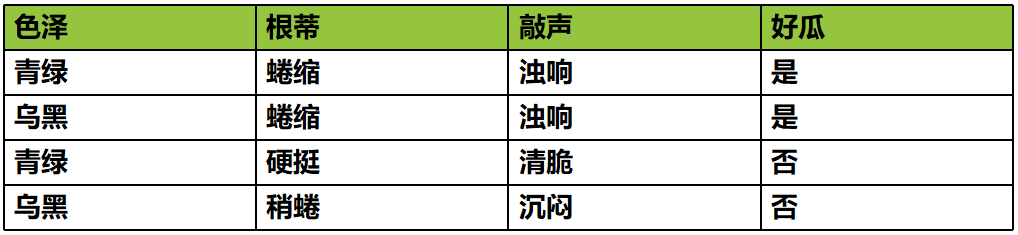

由于我们的模型只能对数字进行计算。所以，我们用$x_1$表示色泽，$x_2$表示根蒂，$x_3$表示敲声。y表示类别。其中，$x_1 = 0$，表示青绿，$x_2 = 2$，表示稍蜷，$y=-1$，表示不是好瓜。具体如下图：

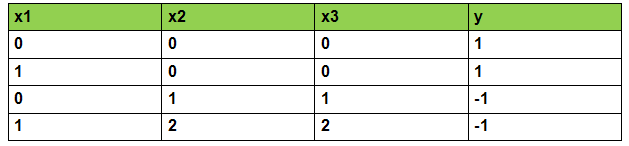

我们的任务就是，用感知机算法建立一个模型，利用训练集上的数据对模型进行训练，并对测试集上的数据进行分类。

#### 什么是感知机

我们知道生物神经网络是由一个个的神经元所组成的，我们知道了神经元的工作原理，就能帮助我们理解神经网络是如何工作的了。上个世纪六十年代，提出了最早的“人造神经元”模型，叫做“感知机”，直到今天还在用。感知机与逻辑回归一样，也是一个二分类模型，那么它又是如何进行预测的呢？

假如，我们希望构建一个感知机模型，根据色泽、根蒂、敲声这三个特征来判断是好瓜还是坏瓜。

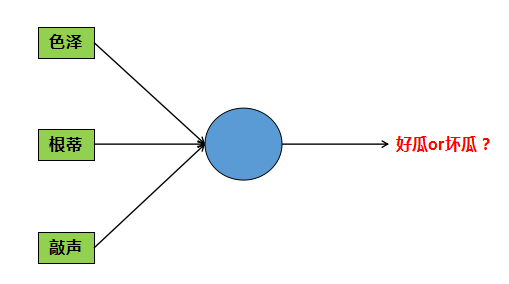

比如说，输入的特征值分别是青绿，蜷缩，浊响对应特征向量为$(0,0,0)$。感知机模型会将每一个特征值$x_i$乘以一个对应的权重$w_i$，再加上一个偏置$b$，所得到的值如果大于等于0，则判断为 +1 类别，即为好瓜，如果得到的值小于0，则判断为-1类别，即不是好瓜。数学模型如下：

$$
f(x) = sign(w_1x_1 + w_2x_2 + .. + w_nx_n + b) \\
$$

$$
sign=\begin{cases}
+1 \space x \geq 0  \\
-1 \space x \lt  0  \\
\end{cases}
$$

其中$x_i$为第$i$个特征值，$w_i$为第$i$个特征所对应的权重，$b$为偏置。

#### 感知机算法流程

我们能否正确对西瓜好坏进行预测，完全取决于**权重**与**偏置**的值是否正确，那么如何找到正确的参数呢？方法与逻辑回归相似，这里就不重复叙述，唯一不同的就是感知机模型所用的损失函数。

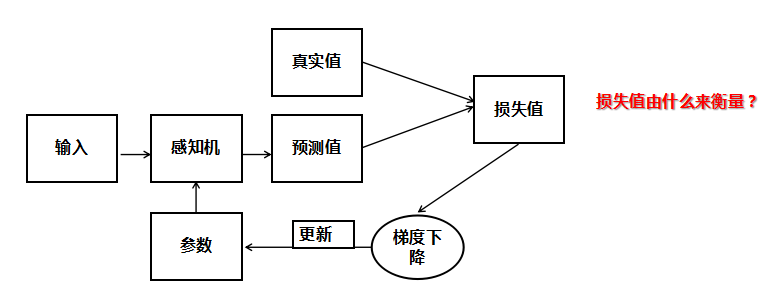

那么，感知机使用的**损失函数**是怎么样的呢？
感知机采用的损失函数最初采用的是**误分类点**到**决策边界**的**距离**：

$$
\frac{|w \cdot x + b|}{||w||}
$$

而对于误分类的数据$(x_i,y_i)$来说：

$$
\begin{cases}
y_i = +1 \space w \cdot x + b \lt 0  \\
y_i = -1 \space w \cdot x + b \geq  0  \\
\end{cases}
$$

所以，$|w \cdot x_i + b | = - y_i(w \cdot x_i + b)$

又因为：

- $\frac{1}{||w||}$ 不影响 $ -y (w \cdot x + b)$ 正负的判断，只需要判断 $-y(w \cdot x + b)$的正负来判断分类的正确与否。所以 $\frac{1}{||w||}$ 对感知机学习算法的中间过程可有可无。

- $\frac{1}{||w||}$ 不影响感知机学习算法的最终结果。因为感知机学习算法最终的终止条件是所有的输入都被正确分类，即不存在误分类的点。则此时损失函数为0。对应于 $ -y (w \cdot x + b)$，即分子为0。则可以看出$\frac{1}{||w||}$ 对最终结果也无影响。

所以最后采用的损失函数为：

$$
L(w,b) = -\sum_{x_i \in M} y_i(w \cdot x_i + b)
$$

其中$M$为误分类点的集合。

感知机只针对误分类的点对参数进行更新，算法流程如下：

1. 选取初始值$w_0,b_0$
2. 在训练集中选取数据$x_i,y_i$
3. 如果$y_i(w \cdot x_i + b) \leq 0$，即这个点为误分类点，则进行如下更新(η为学习率，为0到1之间的值)：
$$
w = w - \eta\frac{\partial L(w,b)}{\partial w} = w + \eta y_i x_i
$$

$$
b = b - \eta\frac{\partial L(w,b)}{\partial b} = b + \eta y_i
$$

4. 重复 2，3 直到训练集中没有误分类点

### 实操练习

#### 编程要求

根据提示，补充`begin-end`之间的`python`代码，构建一个**感知机模型**进行**训练**，并对测试集上数据进行**分类**。

#### 测试说明

输出预测正确率，应大于0.5

In [92]:
import numpy as np

#构建感知机模型
class Perceptron(object):
    
    def __init__(self, learning_rate = 0.01, max_iter = 200):
        self.lr = learning_rate
        self.max_iter = max_iter
        
    def fit(self, data, label):
        '''
        input:data(ndarray):训练数据特征
              label(ndarray):训练数据标签
        output:w(ndarray):训练好的权重
               b(ndarry):训练好的偏置
        '''
        #编写感知机训练方法，w为权重，b为偏置
        self.w = np.array([1.] * data.shape[1])
        self.b = np.array([1.])
        
        #********* Begin *********#
        for _ in range(self.max_iter):
            has_err = False
            for idx in range(len(data)):
                x = data[idx]
                y = label[idx]
                if y * (self.w.dot(x) + self.b) <= 0:
                    has_err = True
                    self.w += self.lr * y * x
                    self.b += self.lr * y
            if not has_err:
                return None
        return None
        #********* End *********#
        
    def predict(self, data):
        '''
        input:data(ndarray):测试数据特征
        output:predict(ndarray):预测标签
        '''
        #********* Begin *********#
        predict = []
        for i in range(data.shape[0]):
            result = self.w.dot(data[i]) + self.b
            if result >= 0:
                result = 1
            else:
                result = -1
            predict.append(result)
            
        predict = np.array(predict)
        #********* End *********#
        return predict

In [93]:
# 加载西瓜数据集
import pandas as pd

wm_df = pd.read_csv('data/西瓜数据集3.0.csv')
wm_df.head()

,编号,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜
0,1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,0.697,0.460,是
1,2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,0.774,0.376,是
2,3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,0.634,0.264,是
3,4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,0.608,0.318,是
4,5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,0.556,0.215,是


In [94]:
# 数据预处理 - 特征选择（列）
wm_df2 = wm_df[['色泽', '根蒂', '敲声', '好瓜']]
wm_df2.head()

,色泽,根蒂,敲声,好瓜
0,青绿,蜷缩,浊响,是
1,乌黑,蜷缩,沉闷,是
2,乌黑,蜷缩,浊响,是
3,青绿,蜷缩,沉闷,是
4,浅白,蜷缩,浊响,是


In [95]:
# 数据预处理 - 编码分类变量
# 手工标签编码"色泽"列
wm_colors = ['青绿', '乌黑', '浅白']
wm_color_labels = wm_df2['色泽'].map(lambda x: wm_colors.index(x))
wm_roots = ['蜷缩', '硬挺', '稍蜷']
wm_root_labels = wm_df2['根蒂'].map(lambda x: wm_roots.index(x))
wm_voices = ['浊响', '清脆', '沉闷']
wm_voice_labels = wm_df2['敲声'].map(lambda x: wm_voices.index(x))
wm_good = {'是': 1, '否': -1}
wm_good_labels = wm_df2['好瓜'].map(lambda x: wm_good[x])

In [96]:
# 构建编码后的numpy数据集
wm_color_labels = wm_color_labels.values.reshape(-1, 1)
wm_root_labels = wm_root_labels.values.reshape(-1, 1)
wm_voice_labels = wm_voice_labels.values.reshape(-1, 1)
wm_good_labels = wm_good_labels.values.reshape(-1, 1)

wm_arr = np.hstack([
    wm_color_labels, 
    wm_root_labels, 
    wm_voice_labels,
    wm_good_labels
])

In [97]:
wm_arr

array([[ 0,  0,  0,  1],
       [ 1,  0,  2,  1],
       [ 1,  0,  0,  1],
       [ 0,  0,  2,  1],
       [ 2,  0,  0,  1],
       [ 0,  2,  0,  1],
       [ 1,  2,  0,  1],
       [ 1,  2,  0,  1],
       [ 1,  2,  2, -1],
       [ 0,  1,  1, -1],
       [ 2,  1,  1, -1],
       [ 2,  0,  0, -1],
       [ 0,  2,  0, -1],
       [ 2,  2,  2, -1],
       [ 1,  2,  0, -1],
       [ 2,  0,  0, -1],
       [ 0,  0,  2, -1]])

In [98]:
# 重排
np.random.shuffle(wm_arr)
wm_arr

array([[ 1,  2,  0, -1],
       [ 0,  0,  2,  1],
       [ 1,  2,  0,  1],
       [ 1,  2,  2, -1],
       [ 0,  0,  2, -1],
       [ 1,  2,  0,  1],
       [ 0,  1,  1, -1],
       [ 2,  0,  0, -1],
       [ 0,  2,  0,  1],
       [ 1,  0,  0,  1],
       [ 0,  2,  0, -1],
       [ 2,  1,  1, -1],
       [ 1,  0,  2,  1],
       [ 0,  0,  0,  1],
       [ 2,  2,  2, -1],
       [ 2,  0,  0, -1],
       [ 2,  0,  0,  1]])

In [99]:
# 选择前10行作为训练集
X_train, y_train = wm_arr[:11, :3], wm_arr[:11, -1]
X_train, y_train

(array([[1, 2, 0],
        [0, 0, 2],
        [1, 2, 0],
        [1, 2, 2],
        [0, 0, 2],
        [1, 2, 0],
        [0, 1, 1],
        [2, 0, 0],
        [0, 2, 0],
        [1, 0, 0],
        [0, 2, 0]]),
 array([-1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1]))

In [100]:
# 其余行作为测试集
X_test, y_test = wm_arr[11:, :3], wm_arr[11:, -1]
X_test, y_test

(array([[2, 1, 1],
        [1, 0, 2],
        [0, 0, 0],
        [2, 2, 2],
        [2, 0, 0],
        [2, 0, 0]]),
 array([-1,  1,  1, -1, -1,  1]))

In [101]:
# 训练模型
p = Perceptron()
p.fit(X_train, y_train)

In [102]:
# 预测
y_pred = p.predict(X_test)
y_pred

array([-1, -1,  1, -1, -1, -1])

In [103]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred, y_test)
acc

0.6666666666666666

In [104]:
# 使用sklearn划分数据集
from sklearn.model_selection import train_test_split
X = wm_arr[:, :-1]
X

array([[1, 2, 0],
       [0, 0, 2],
       [1, 2, 0],
       [1, 2, 2],
       [0, 0, 2],
       [1, 2, 0],
       [0, 1, 1],
       [2, 0, 0],
       [0, 2, 0],
       [1, 0, 0],
       [0, 2, 0],
       [2, 1, 1],
       [1, 0, 2],
       [0, 0, 0],
       [2, 2, 2],
       [2, 0, 0],
       [2, 0, 0]])

In [105]:
y = wm_arr[:, -1]
y

array([-1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1])

In [106]:
# 拆分数据集，训练集占比60%,测试集占比40%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.4, random_state=123
)

# 训练模型
p = Perceptron()
p.fit(X_train, y_train)
# 预测
y_pred = p.predict(X_test)
y_pred
# 计算准确率
acc = accuracy_score(y_pred, y_test)
acc

0.5714285714285714

## 2. scikit-learn感知机实践 - 癌细胞精准识别

### 任务描述

利用 sklearn 构建感知机算法，并利用癌细胞数据对模型进行训练，然后对未知的癌细胞数据进行识别。

### 相关知识

为了完成本任务，需要掌握：

1. Perceptron

#### 数据集介绍

乳腺癌数据集的样本数量是569，样本中包括**诊断类别**和**属性**，用来预测的属性一共30个，如：

- radius：半径（从中心到边缘上点的距离的平均值）
- texture：纹理（灰度值的标准偏差）等等

诊断类别有： 

- WDBC-Malignant：恶性
- WDBC-Benign：良性

数据集的80%作为训练集，数据集的20%作为测试集，训练集和测试集中都包括特征和类别。其中特征和类别均为数值类型，类别中0代表良性， 1代表恶性。

`sklearn`中已经提供了乳腺癌数据集的相关接口，可通过`sklearn.datasets`的`load_breast_cancer()`函数加载。

#### Perceptron

在`sklearn`中，使用`Perceptron`方法实现感知机算法，`Perceptron` 的构造函数中有两个常用的参数可以设置：

- `eta0`：学习率大小，默认为1.0
- `max_iter`：最大训练轮数

和sklearn中其他分类器一样， Perceptron类中的fit函数用于训练模型， fit函数有两个向量输入：

- `X` ：大小为`(样本数量,特征数量)`的`ndarray`，存放训练样本；
- `Y` ：值为整型，大小为`(样本数量,)` 的`ndarray`，存放训练样本的分类标签。

`Perceptron`类中的`predict`函数用于预测，返回预测标签，`predict` 函数有一个向量输入：

- `X` ：大小为`(样本数量,特征数量)`的`ndarray`，存放预测样本。

`Perceptron`的使用代码如下：

In [109]:
from sklearn.linear_model.perceptron import Perceptron
clf = Perceptron()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_pred, y_test)
acc

0.2857142857142857

### 实操练习

#### 编程要求

在`begin-end`之间补充代码，使用`sklearn`构建感知机模型，利用训练集数据与训练标签对模型进行训练，然后使用训练好的模型对测试集数据进行预测并输出准确率。

#### 测试说明

输出预测的准确率，应高于0.90

In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model.perceptron import Perceptron
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# 拆分数据集，训练集占比80%,测试集占比20%
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, 
    test_size=0.2, random_state=123
)

clf = Perceptron(max_iter = 1000, eta0 = 0.1, random_state = 666)
#训练模型
clf.fit(X_train,y_train)
#获取预测标签
y_pred = clf.predict(X_test)
# 计算准确率
acc = accuracy_score(y_pred, y_test)
acc

0.9385964912280702